In [1]:
import pandas as pd
import numpy as np

In [ ]:
file_path = '/preprocessed_COVID19_dataset.xlsx' 
dataset = pd.read_excel(file_path)
dataset.head()

,Subject_ID,AGE,GENDER,LOS,DAYS OF SYMPTOMS,INTUBATION,tINTUBATION_cleaned,CPAP,tCPAP,HIGH FLOW,...,Medication_ciproxin,REMDESIVIR_Processed,TAMIFLU_Processed,KALETRA_Processed,DEXATON_Processed,BARITICINIB_Processed,ANAKINRA_Processed,TOCILIZUMAB_Processed,PLAQUENIL_Processed,CCI
0,1,66,1,15.0,6.0,0,0.0,0,0.0,0,...,0,0,1,1,0,0,0,0,1,2
1,2,52,2,12.0,4.0,0,0.0,0,0.0,0,...,0,0,0,1,0,0,0,0,1,1
2,3,63,1,13.0,6.0,0,0.0,0,0.0,0,...,0,0,0,1,0,0,0,0,1,3
3,4,55,1,11.0,10.0,0,0.0,0,0.0,0,...,0,0,0,1,0,0,0,0,1,1
4,5,72,1,19.0,4.0,0,0.0,0,0.0,0,...,0,0,1,1,0,0,0,0,1,6


In [3]:
# Remove 'Subject_ID' from the dataset
dataset = dataset.drop(columns=['Subject_ID'])
# Find and drop rows where 'Outcome_numerical' is 3
dataset = dataset[dataset['Outcome_numerical'] != 3]

In [ ]:
# Check the remaining shape and missing values
cleaned_shape = dataset.shape
remaining_missing_values = dataset.isnull().sum().max()
cleaned_shape, remaining_missing_values


((470, 167), 0)

/Users/michael/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/michael/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


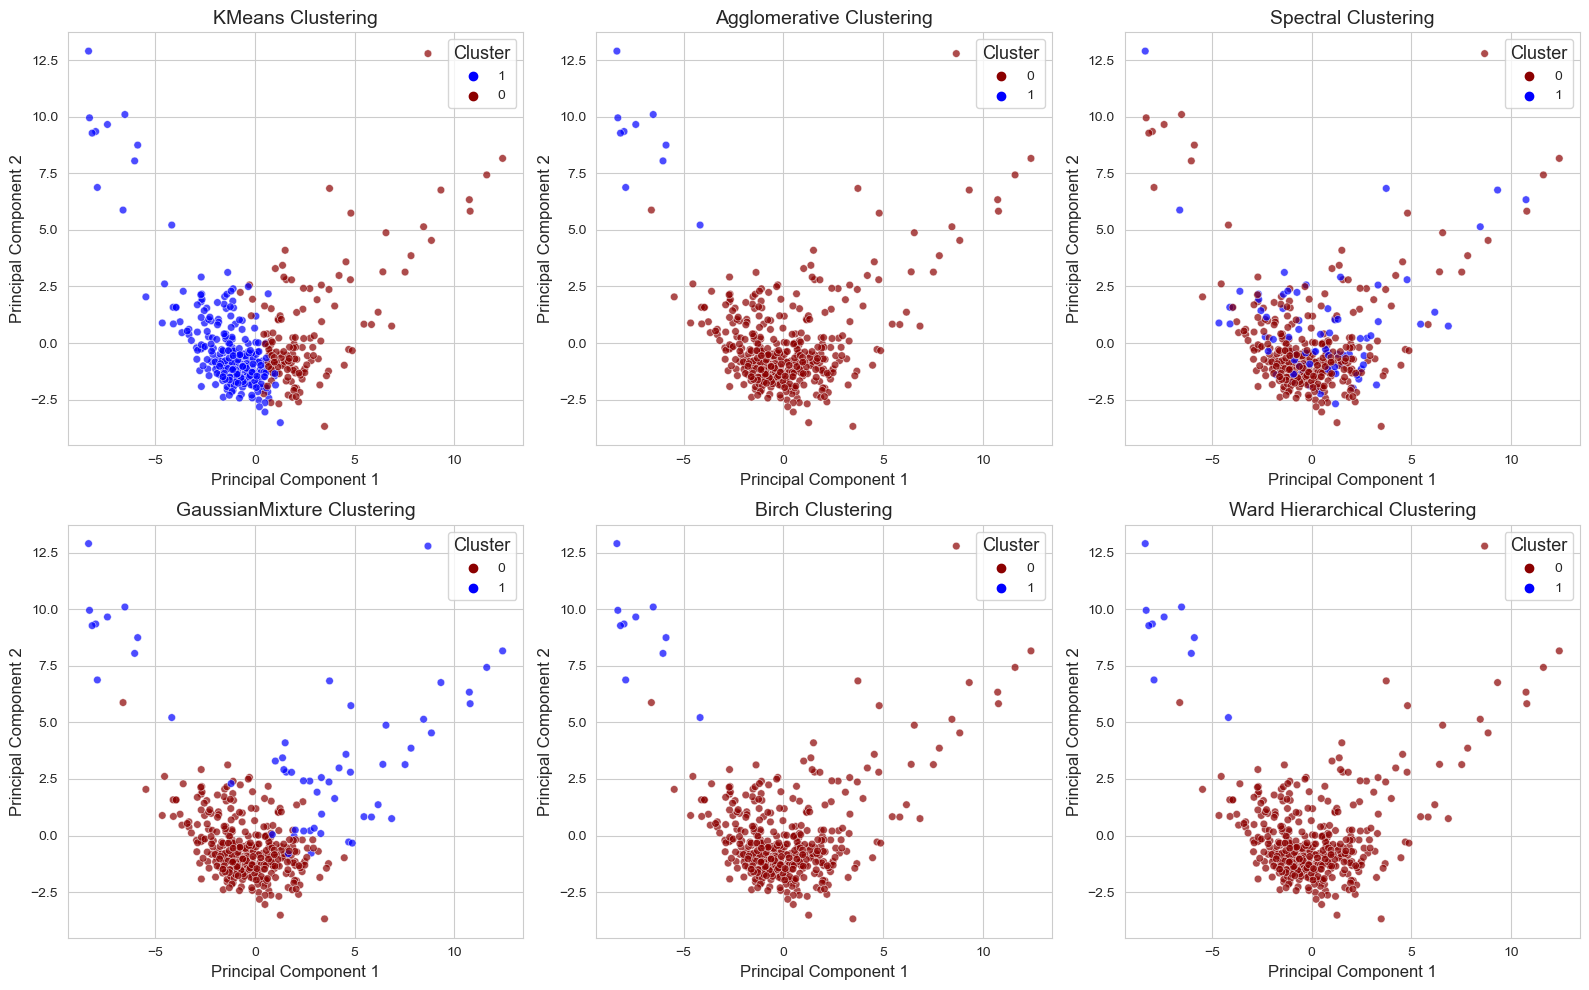

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.cluster import DBSCAN, MeanShift, OPTICS, Birch, AffinityPropagation, MiniBatchKMeans
from sklearn.cluster import FeatureAgglomeration
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply Seaborn styles for nicer plots
sns.set_style("whitegrid")

# Your selected features and data preparation
features_to_cluster = dataset.columns.tolist()
discharged_patients = dataset[dataset['Outcome_numerical'] == 1]
X = discharged_patients[features_to_cluster].fillna(1) 

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering algorithms setup
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=2, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=2),
    'Spectral': SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=42),
    'GaussianMixture': GaussianMixture(n_components=2, random_state=20),
    'Birch': Birch(n_clusters=2),
    'Ward Hierarchical': AgglomerativeClustering(n_clusters=2, linkage='ward'),
}

# Apply PCA for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Set up the plotting canvas
fig, axes = plt.subplots(2, 3, figsize=(16, 10)) 
axes = axes.flatten()

# Define your custom palette with improved colors
custom_palette = {'0': '#8B0000', '1': '#0000FF'}  # Dark red and blue

# Plot each clustering result
for i, (name, alg) in enumerate(clustering_algorithms.items()):
    # Fit and predict clusters
    labels = alg.fit_predict(X_scaled)
    str_labels = np.array([str(label) for label in labels])

    # Create a DataFrame for plotting
    pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
    pca_df['Cluster'] = str_labels
    
    # Plotting with aesthetic improvements
    sns.scatterplot(ax=axes[i], x='Principal Component 1', y='Principal Component 2', hue='Cluster',
                    data=pca_df, palette=custom_palette, alpha=0.7, legend='brief', s=30)
    axes[i].set_title(f'{name} Clustering', fontsize=14)
    axes[i].set_xlabel('Principal Component 1', fontsize=12)
    axes[i].set_ylabel('Principal Component 2', fontsize=12)
    axes[i].legend(title='Cluster', fontsize=10, title_fontsize='13', loc='upper right')
    axes[i].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()


In [8]:
kmeans = clustering_algorithms['KMeans']
centroids = kmeans.cluster_centers_
feature_diff = np.abs(centroids[0] - centroids[1])
feature_importance_kmeans = pd.Series(feature_diff, index=features_to_cluster).sort_values(ascending=False)
print("Feature importance for KMeans clusters:")
print(feature_importance_kmeans.head(20))  

Feature importance for KMeans clusters:
Medication_zyvoxid       1.198993
Medication_tazocin       1.163370
LOS                      1.037200
Medication_meronem       0.921316
CCI                      0.828223
CPAP                     0.804634
Medication_voncon        0.775775
UREA                     0.728421
tCPAP                    0.714473
PERNEUTROPHILS           0.699905
PERLYMPHOCYTES           0.686419
Glu                      0.660684
DYSPNEAx                 0.654735
FIO2 eisagwgh_cleaned    0.645651
LDH                      0.619574
CM/neoplasm_Presence     0.609120
INFILTRATE_numerical     0.603439
FERRITIN                 0.586039
CM/DM_Presence           0.550385
WHO score                0.541069
dtype: float64


In [9]:
# KMeans:
labels = clustering_algorithms['KMeans'].labels_

# Adding these labels back to your original dataset:
discharged_patients['Cluster'] = labels

# Computing the mean of each feature within each cluster:
cluster_means = discharged_patients.groupby('Cluster').mean()

# Computing the differences between cluster means to identify distinguishing features:
cluster_diffs = cluster_means.diff().abs().iloc[-1].sort_values(ascending=False)
print("Features contributing to cluster differences:")
print(cluster_diffs.head(20)) 


Features contributing to cluster differences:
FERRITIN                 402.663601
LDH                       76.030171
FIBRINOGEN                70.923259
ABSLYMPHOCYTES            46.426235
PLT                       37.219411
Glu                       31.455327
TnI                       19.780224
UREA                      15.927937
PERNEUTROPHILS             8.713067
Hb                         8.399814
LOS                        7.969530
AGE                        7.873652
CPK                        7.744651
PO2                        7.588477
PERLYMPHOCYTES             6.821751
FIO2 eisagwgh_cleaned      6.734777
SGPT                       5.093190
Systolic_BP                2.977645
APTT                       2.302533
SGOT                       2.198241
Name: 1, dtype: float64


/var/folders/dj/sx7b12451lzfs9p_v72xnsv40000gn/T/ipykernel_75662/3129268725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharged_patients['Cluster'] = labels


In [10]:
# Getting the PCA component loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Turning this into a DataFrame for easier interpretation
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=features_to_cluster)
print("PCA Component Loadings:")
print(loading_matrix.abs().sort_values(by='PC1', ascending=False).head(20))  # Top 20 for PC1
print(loading_matrix.abs().sort_values(by='PC2', ascending=False).head(20))  # Top 20 for PC2


PCA Component Loadings:
                            PC1       PC2
LOS                    0.625314  0.382250
LDH                    0.550522  0.104271
Medication_ecalta      0.528624  0.384130
tCPAP                  0.507631  0.373682
Medication_zyvoxid     0.505403  0.192661
CPAP                   0.495220  0.402279
Medication_tazocin     0.492193  0.021537
PERNEUTROPHILS         0.468743  0.022407
FIBRINOGEN             0.465064  0.388489
Glu                    0.460897  0.203527
INTUBATION             0.450524  0.368952
PERLYMPHOCYTES         0.428666  0.003343
FIO2 eisagwgh_cleaned  0.422664  0.247190
tINTUBATION_cleaned    0.413737  0.334001
Hb                     0.411495  0.592819
Medication_voncon      0.396503  0.112513
ABSLYMPHOCYTES         0.391256  0.573331
FERRITIN               0.385629  0.024512
UREA                   0.383806  0.211509
Medication_meronem     0.377923  0.340955
                           PC1       PC2
CRP                   0.311858  0.613171
Hb          

In [ ]:
# Get top 20 features for each PC
top_20_PC1 = loading_matrix_abs.nlargest(20, 'PC1')
top_20_PC2 = loading_matrix_abs.nlargest(20, 'PC2')

# Combine top 20 features for both PCs (might be more than 20 unique features in total)
top_features = pd.concat([top_20_PC1, top_20_PC2]).drop_duplicates()
top_features_heatmap = loading_matrix.loc[top_features.index]  # Get original signed loadings for these features

# Create heatmap for top features
plt.figure(figsize=(10, 12))
sns.heatmap(top_features_heatmap, cmap='viridis', annot=True)
plt.title('Heatmap of Top 20 PCA Component Loadings')
plt.show()


In [ ]:
def draw_biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    
    plt.figure(figsize=(12, 8))
    plt.scatter(xs * scalex, ys * scaley, c='gray', alpha=0.5)  # Plot scores (the transformed data points)
    
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='red', alpha=0.5)
        if labels is not None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='green', ha='center', va='center')
    
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Call the function
draw_biplot(principalComponents, np.transpose(pca.components_[0:2, :]), labels=features_to_cluster)


In [ ]:
# Choose the best-performing algorithm
best_algorithm = KMeans(n_clusters=2, random_state=42)
discharged_patients['Cluster'] = best_algorithm.fit_predict(X_scaled)  # Assign clustering labels

# Integrate the new clusters back into the original DataFrame
cluster_mapping = { 0: 'Severe', 1: 'Non-Severe'}

discharged_patients_mod = discharged_patients.copy()
discharged_patients_mod['New_Outcome'] = discharged_patients_mod['Cluster'].map(cluster_mapping)

# Map back to numerical values 
numerical_mapping = {'Non-Severe': 1, 'Severe': 0}
discharged_patients_mod['New_Outcome'] = discharged_patients_mod['New_Outcome'].map(numerical_mapping)


dataset.loc[discharged_patients_mod.index, 'Outcome_numerical'] = discharged_patients_mod['New_Outcome']



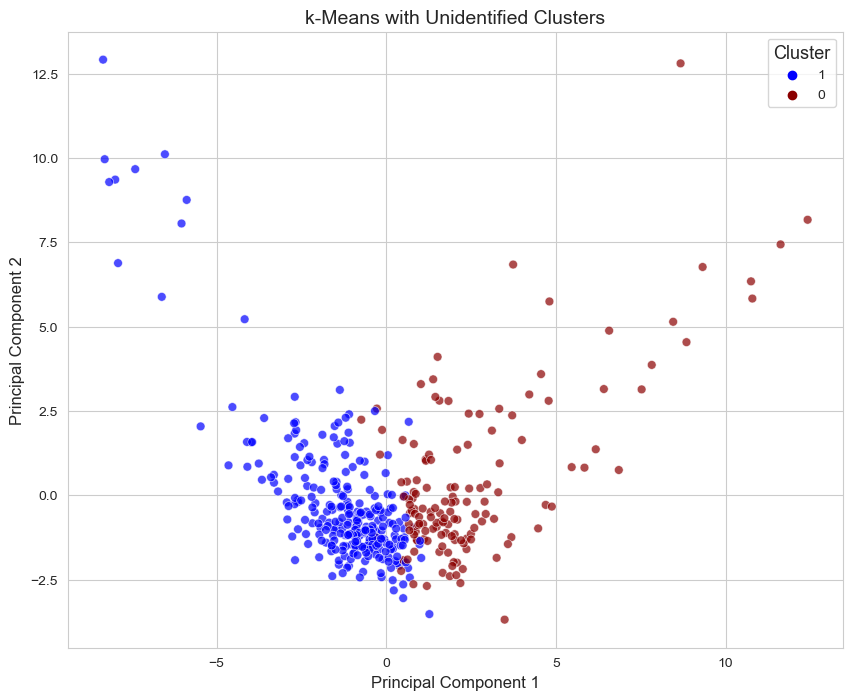

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_scaled are the scaled features used for clustering
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels from your modified data
principalDf['Cluster'] = discharged_patients_mod['New_Outcome'].values 
# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: '0', 1: '1'})

# Define your custom palette with improved colors
custom_palette = {'0': '#8B0000', '1': '#0000FF'}  # Dark red for Severe, Blue for Non-Severe

# Plotting with aesthetic improvements
plt.figure(figsize=(10, 8))  # Set the figure size for better clarity
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster',
                data=principalDf, palette=custom_palette, alpha=0.7, s=40)
plt.title('k-Means with Unidentified Clusters', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize='13')
plt.show()


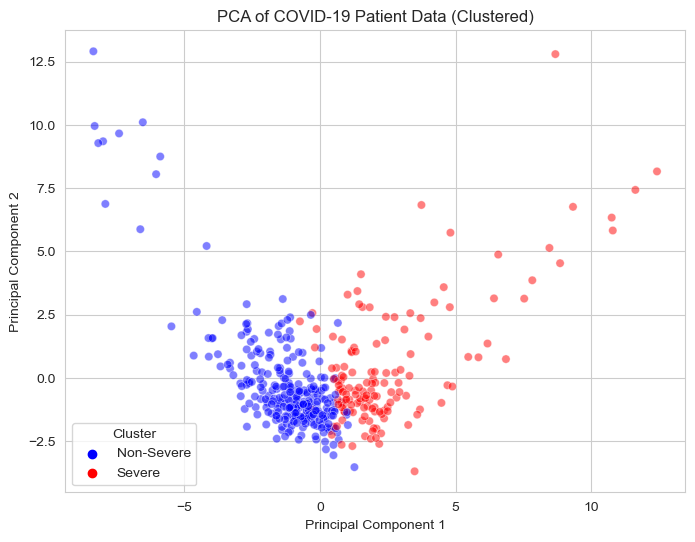

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_scaled is the scaled features used for clustering
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels
principalDf['Cluster'] = discharged_patients_mod['New_Outcome'].values 
# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: 'Severe', 1: 'Non-Severe'})

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=principalDf, palette=['blue', 'red', ], alpha=0.5)
plt.title('PCA of COVID-19 Patient Data (Clustered)')
plt.legend(title='Cluster')
plt.show()


In [16]:
# Counting each category
cluster_counts = dataset['Outcome_numerical'].value_counts()
cluster_counts

1    273
0    142
2     55
Name: Outcome_numerical, dtype: int64

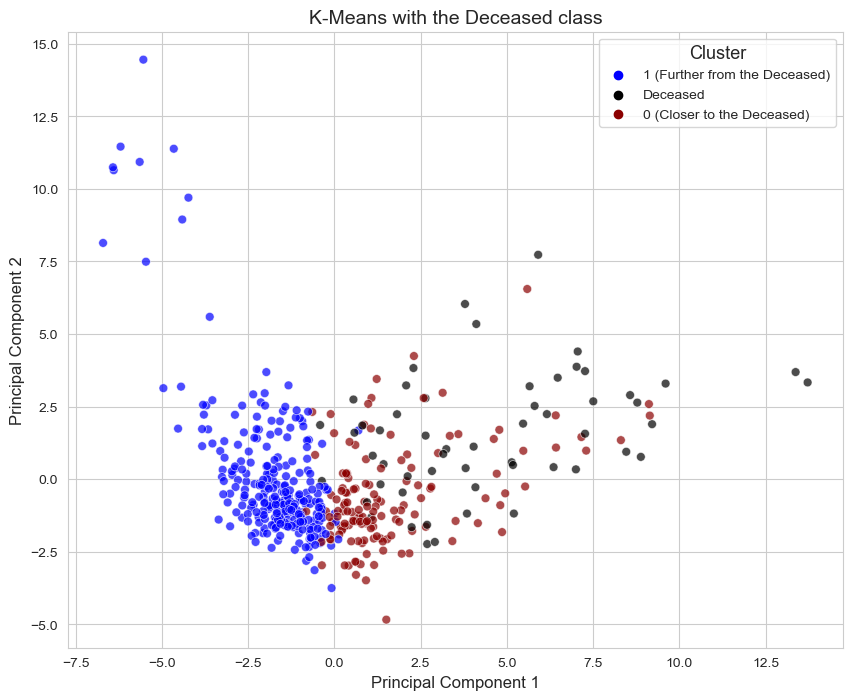

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply Seaborn styles for nicer plots
sns.set_style("whitegrid")

# Standardize the features
U = dataset[features_to_cluster].fillna(1)
scaler = StandardScaler()
U_scaled = scaler.fit_transform(U)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(U_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels
principalDf['Cluster'] = dataset['Outcome_numerical'].values 
# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: '0 (Closer to the Deceased)', 1: '1 (Further from the Deceased)', 2: 'Deceased'})

# Define your custom palette with improved colors for three classes
custom_palette = {'1 (Further from the Deceased)': '#0000FF', 'Deceased': 'black', '0 (Closer to the Deceased)': '#8B0000'}  # Blue for Severe, Black for Non-Severe, Dark Red for Death

# Plotting with aesthetic improvements
plt.figure(figsize=(10, 8))  # Set the figure size for better clarity
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster',
                data=principalDf, palette=custom_palette, alpha=0.7, s=40)  # Set alpha and marker size
plt.title('K-Means with the Deceased class', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize='13')
plt.show()


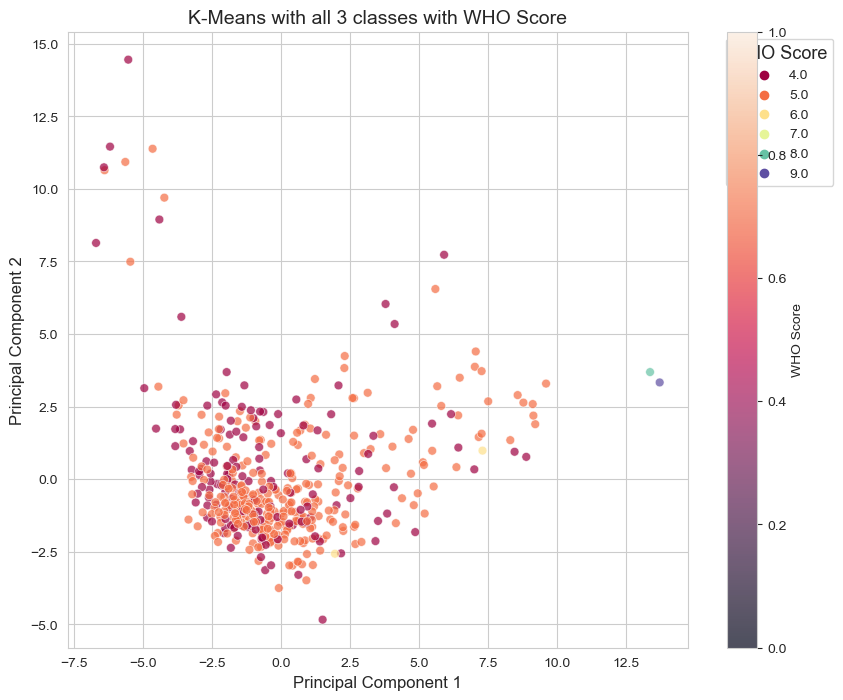

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply Seaborn styles for nicer plots
sns.set_style("whitegrid")

# Standardize the features
U = dataset[features_to_cluster].fillna(1)
scaler = StandardScaler()
U_scaled = scaler.fit_transform(U)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(U_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels and WHO_score
principalDf['Cluster'] = dataset['Outcome_numerical'].values 
principalDf['WHO score'] = dataset['WHO score']

# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: '0 (Closer to the Deceased)', 1: '1 (Further from the Deceased)', 2: 'Deceased'})

# Define your custom palette with improved colors for WHO scores
who_palette = sns.color_palette("Spectral", as_cmap=True)

# Plotting with aesthetic improvements
plt.figure(figsize=(10, 8))  # Set the figure size for better clarity
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='WHO score',
                data=principalDf, palette=who_palette, alpha=0.7, s=40)  # Set alpha and marker size

plt.title('K-Means with all 3 classes with WHO Score', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='WHO Score', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='WHO Score')
plt.show()


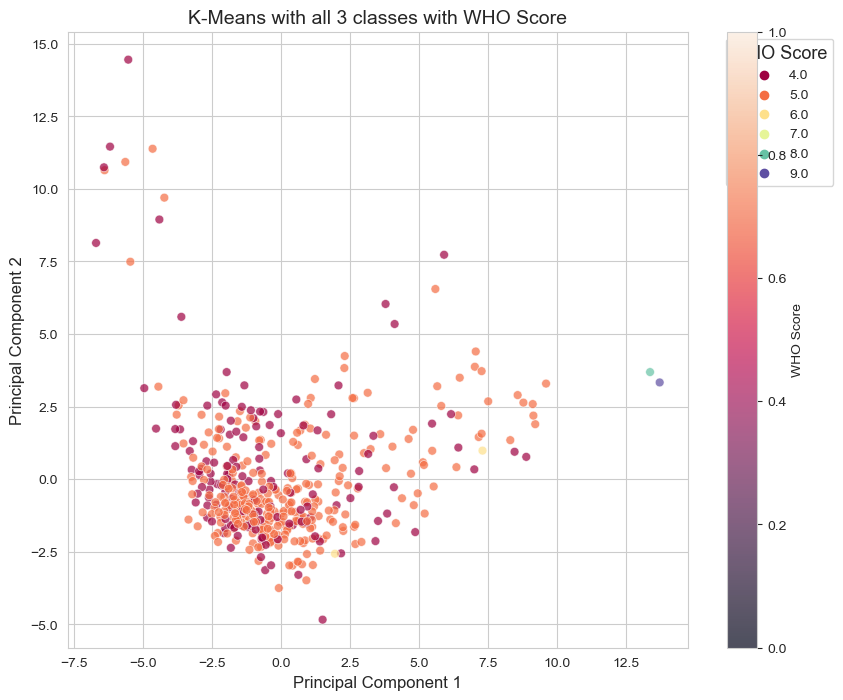

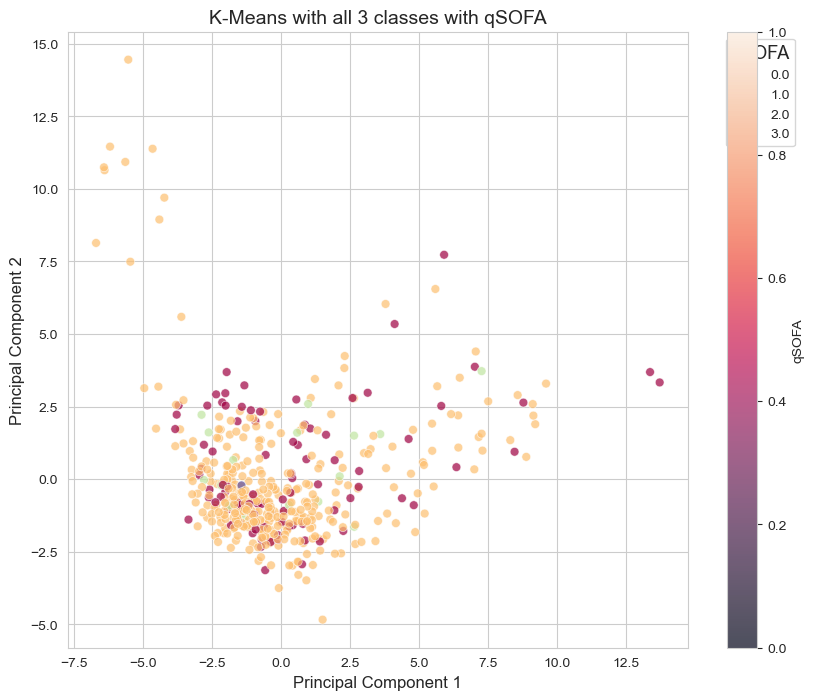

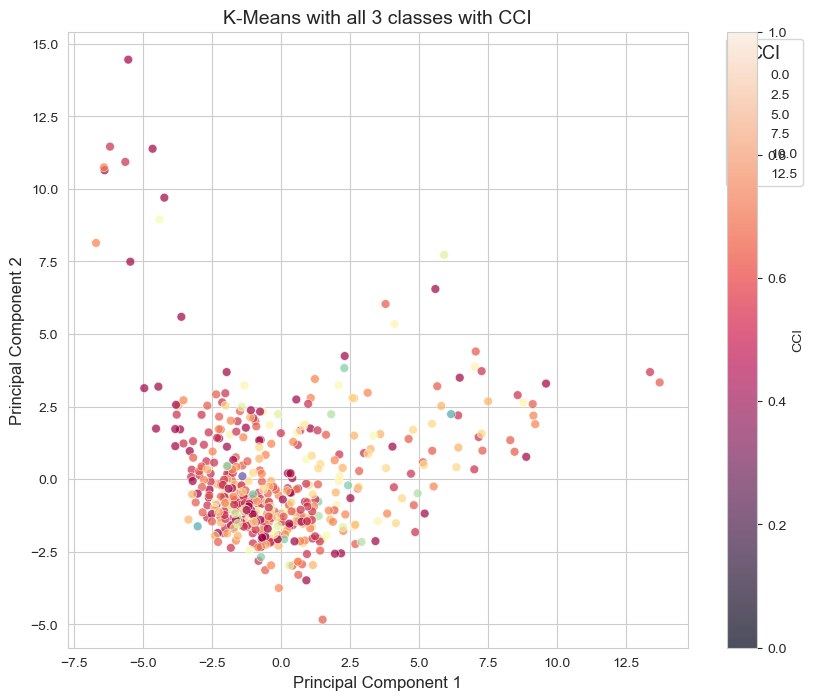

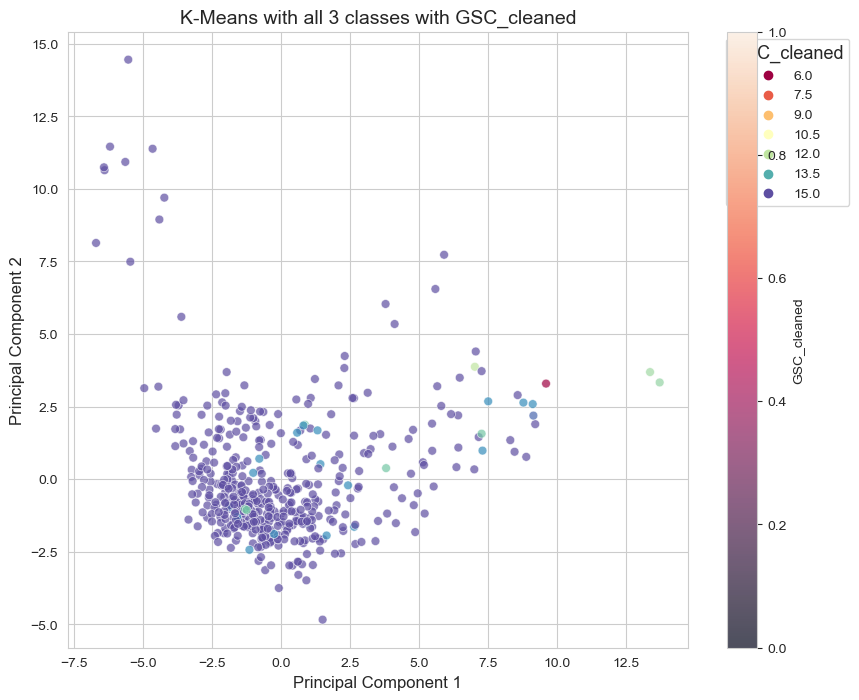

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply Seaborn styles for nicer plots
sns.set_style("whitegrid")

# Standardize the features
U = dataset[features_to_cluster].fillna(1)
scaler = StandardScaler()
U_scaled = scaler.fit_transform(U)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(U_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels
principalDf['Cluster'] = dataset['Outcome_numerical'].values 

# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: '0 (Closer to the Deceased)', 1: '1 (Further from the Deceased)', 2: 'Deceased'})

# Define your custom palette with improved colors for the scores
score_palette = sns.color_palette("Spectral", as_cmap=True)

# Plotting WHO Score
plt.figure(figsize=(10, 8))  # Set the figure size for better clarity
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['WHO score'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40) 
plt.title('K-Means with all 3 classes with WHO Score', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='WHO Score', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='WHO Score')
plt.show()

# Plotting qSOFA
plt.figure(figsize=(10, 8))  # Set the figure size for better clarity
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['qSOFA'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40) 
plt.title('K-Means with all 3 classes with qSOFA', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='qSOFA', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='qSOFA')
plt.show()

# Plotting CCI
plt.figure(figsize=(10, 8))  # Set the figure size for better clarity
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['CCI'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40) 
plt.title('K-Means with all 3 classes with CCI', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='CCI', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='CCI')
plt.show()

# Plotting GSC_cleaned
plt.figure(figsize=(10, 8))  # Set the figure size for better clarity
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['GSC_cleaned'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40) 
plt.title('K-Means with all 3 classes with GSC_cleaned', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='GSC_cleaned', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='GSC_cleaned')
plt.show()


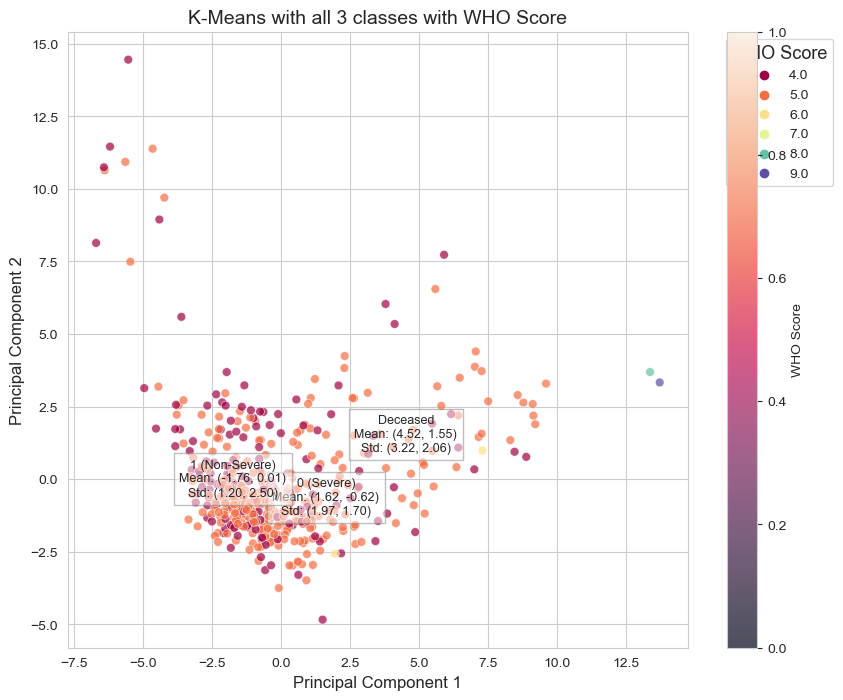

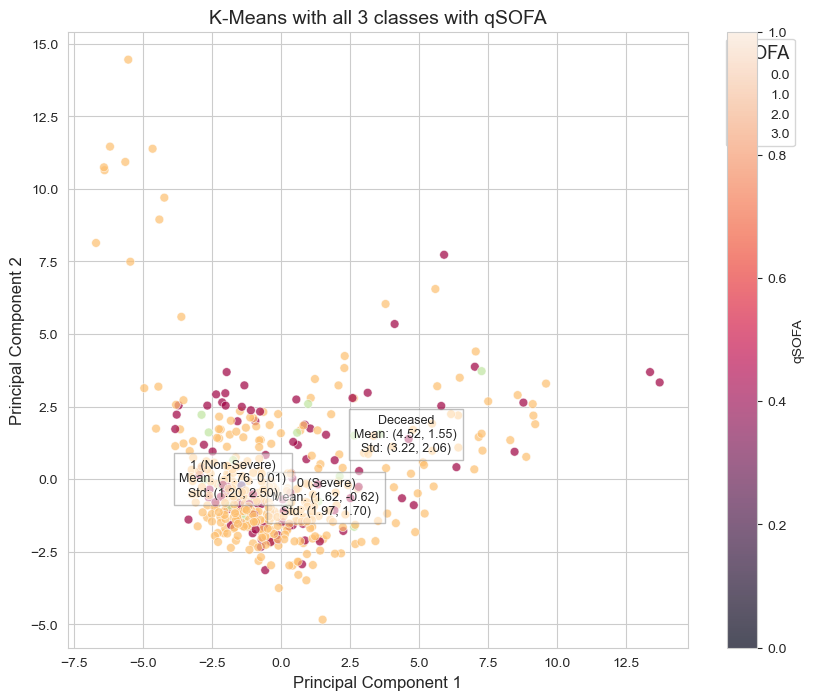

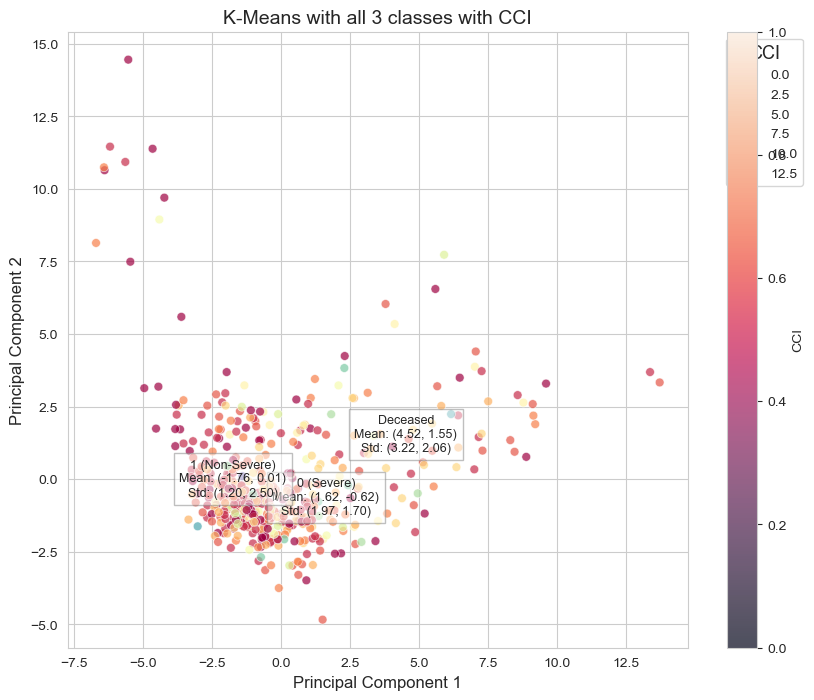

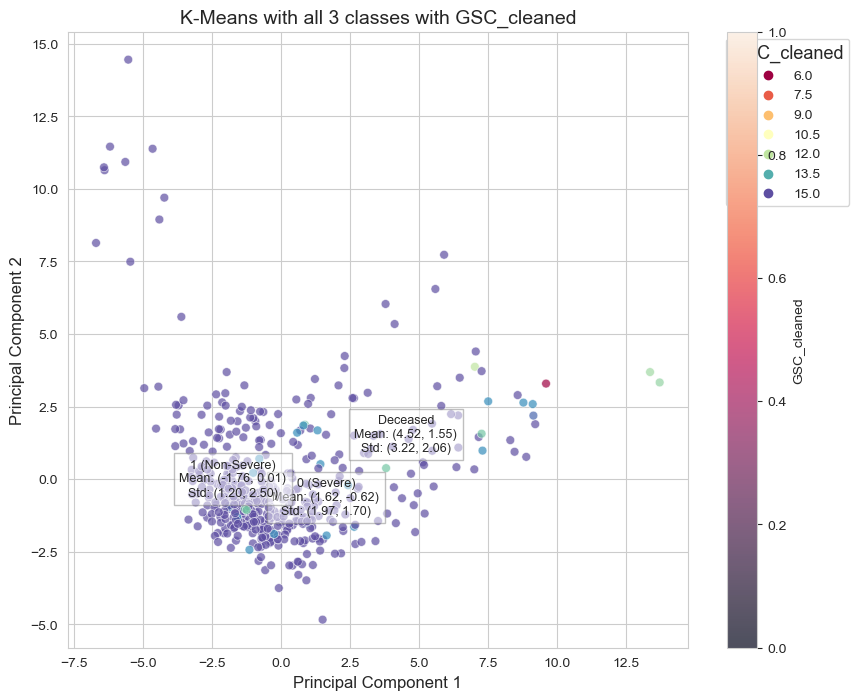

In [ ]:
import numpy as np

# Standardize the features
U = dataset[features_to_cluster].fillna(1)
scaler = StandardScaler()
U_scaled = scaler.fit_transform(U)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(U_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels
principalDf['Cluster'] = dataset['Outcome_numerical'].values 

# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: '0 (Severe)', 1: '1 (Non-Severe)', 2: 'Deceased'})

# Define your custom palette with improved colors for the scores
score_palette = sns.color_palette("Spectral", as_cmap=True)

# Function to annotate mean and std
def annotate_mean_std(ax, group, data):
    means = data.groupby(group).mean()
    stds = data.groupby(group).std()
    for name, mean, std in zip(means.index, means.values, stds.values):
        ax.text(mean[0], mean[1], f'{name}\nMean: ({mean[0]:.2f}, {mean[1]:.2f})\nStd: ({std[0]:.2f}, {std[1]:.2f})', 
                horizontalalignment='center', 
                verticalalignment='center', 
                fontsize=9, 
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='grey'))

# Plotting WHO Score
plt.figure(figsize=(10, 8))  # Set the figure size for better clarity
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['WHO score'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40)  
plt.title('K-Means with all 3 classes with WHO Score', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='WHO Score', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='WHO Score')
annotate_mean_std(plt.gca(), 'Cluster', principalDf)
plt.show()

# Plotting qSOFA
plt.figure(figsize=(10, 8))  # Set the figure size for better clarity
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['qSOFA'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40)  
plt.title('K-Means with all 3 classes with qSOFA', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='qSOFA', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='qSOFA')
annotate_mean_std(plt.gca(), 'Cluster', principalDf)
plt.show()

# Plotting CCI
plt.figure(figsize=(10, 8))  # Set the figure size for better clarity
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['CCI'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40)  
plt.title('K-Means with all 3 classes with CCI', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='CCI', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='CCI')
annotate_mean_std(plt.gca(), 'Cluster', principalDf)
plt.show()

# Plotting GSC_cleaned
plt.figure(figsize=(10, 8))  # Set the figure size for better clarity
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['GSC_cleaned'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40)  
plt.title('K-Means with all 3 classes with GSC_cleaned', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='GSC_cleaned', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='GSC_cleaned')
annotate_mean_std(plt.gca(), 'Cluster', principalDf)
plt.show()


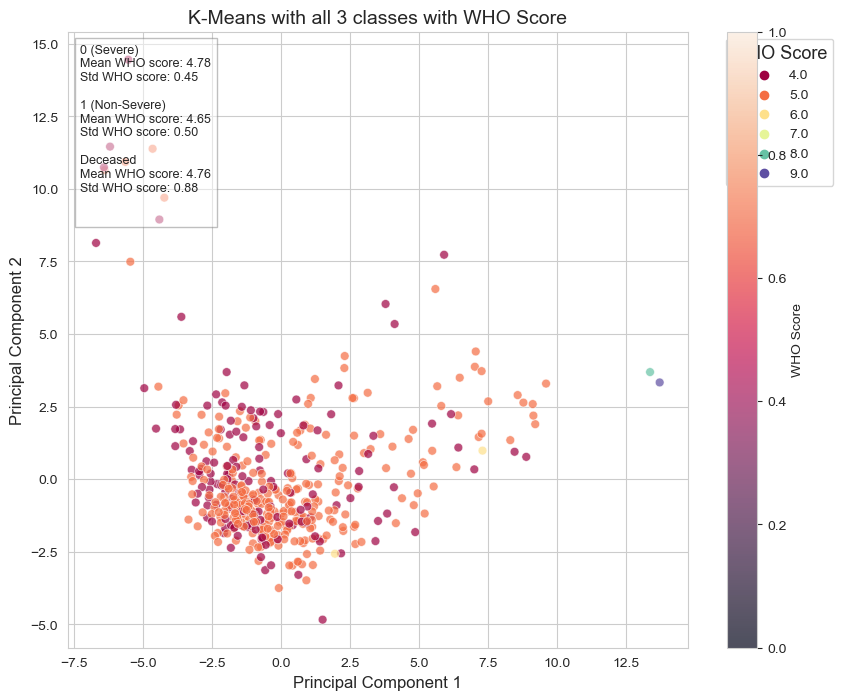

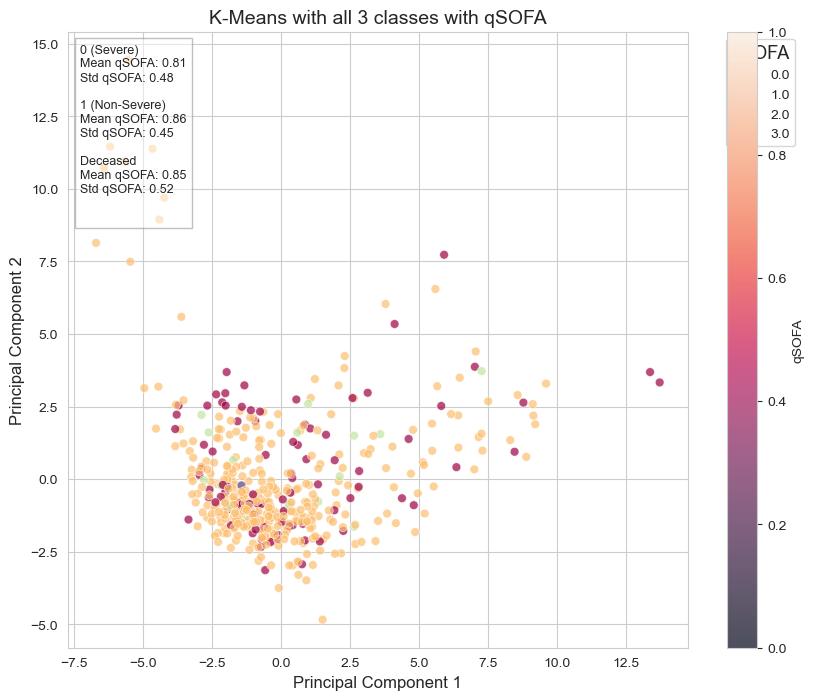

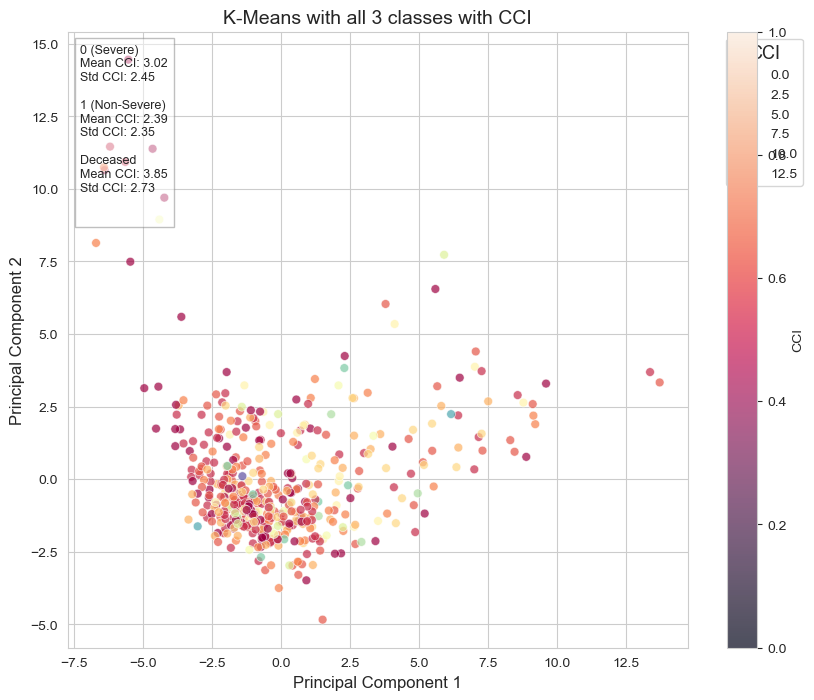

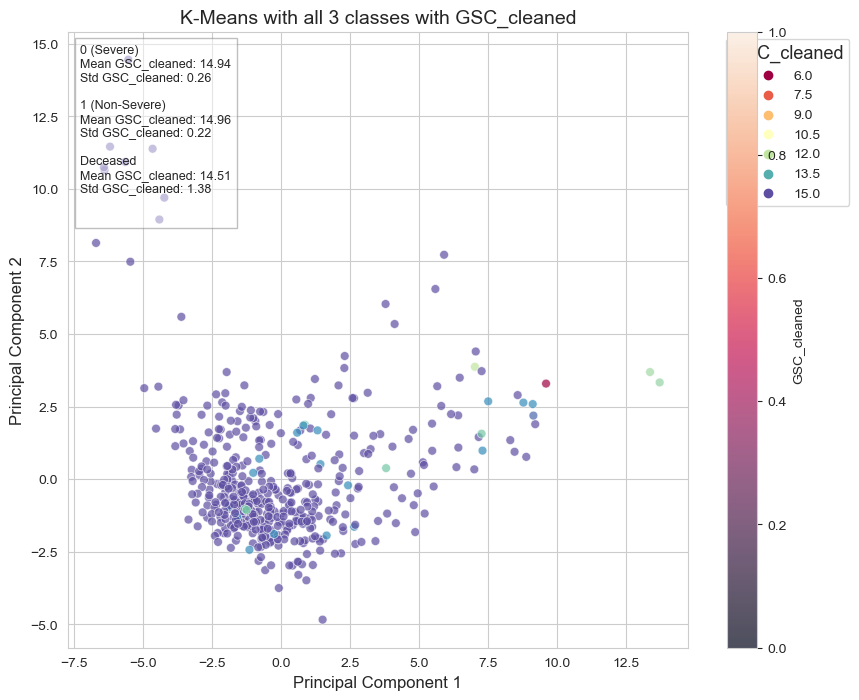

In [ ]:
import numpy as np

# Standardize the features
U = dataset[features_to_cluster].fillna(1)
scaler = StandardScaler()
U_scaled = scaler.fit_transform(U)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(U_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels
principalDf['Cluster'] = dataset['Outcome_numerical'].values 

# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: '0 (Severe)', 1: '1 (Non-Severe)', 2: 'Deceased'})

# Merge the cluster information back to the original dataset
dataset['Cluster'] = principalDf['Cluster']

# Define your custom palette with improved colors for the scores
score_palette = sns.color_palette("Spectral", as_cmap=True)

# Function to annotate mean and std for scores
def annotate_score_mean_std(ax, group, score):
    grouped = dataset.groupby(group)[score]
    means = grouped.mean()
    stds = grouped.std()
    text_str = ''
    for name, mean, std in zip(means.index, means.values, stds.values):
        text_str += f'{name}\nMean {score}: {mean:.2f}\nStd {score}: {std:.2f}\n\n'
    ax.text(0.02, 0.98, text_str, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, edgecolor='grey'))

# Plotting WHO Score
plt.figure(figsize=(10, 8))  
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['WHO score'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40)  
plt.title('K-Means with all 3 classes with WHO Score', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='WHO Score', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='WHO Score')
annotate_score_mean_std(plt.gca(), 'Cluster', 'WHO score')
plt.show()

# Plotting qSOFA
plt.figure(figsize=(10, 8))  
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['qSOFA'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40)  
plt.title('K-Means with all 3 classes with qSOFA', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='qSOFA', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='qSOFA')
annotate_score_mean_std(plt.gca(), 'Cluster', 'qSOFA')
plt.show()

# Plotting CCI
plt.figure(figsize=(10, 8))  
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['CCI'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40)  
plt.title('K-Means with all 3 classes with CCI', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='CCI', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='CCI')
annotate_score_mean_std(plt.gca(), 'Cluster', 'CCI')
plt.show()

# Plotting GSC_cleaned
plt.figure(figsize=(10, 8))  
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['GSC_cleaned'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40)  
plt.title('K-Means with all 3 classes with GSC_cleaned', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='GSC_cleaned', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='GSC_cleaned')
annotate_score_mean_std(plt.gca(), 'Cluster', 'GSC_cleaned')
plt.show()


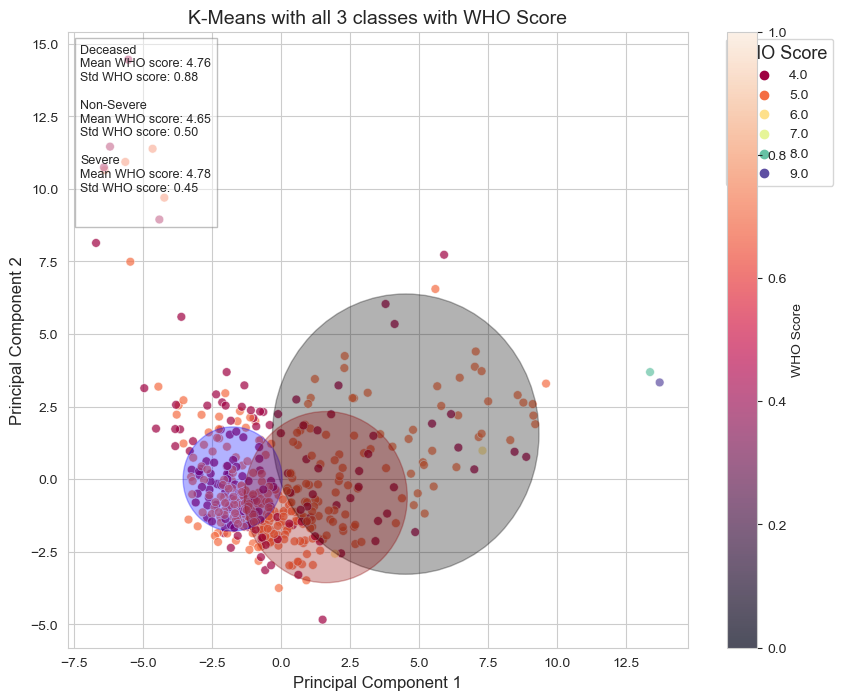

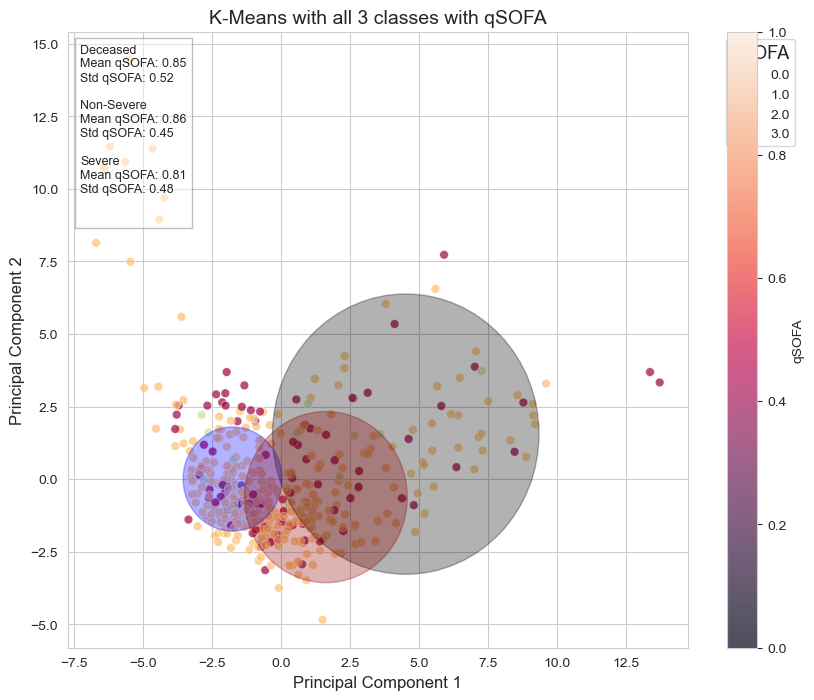

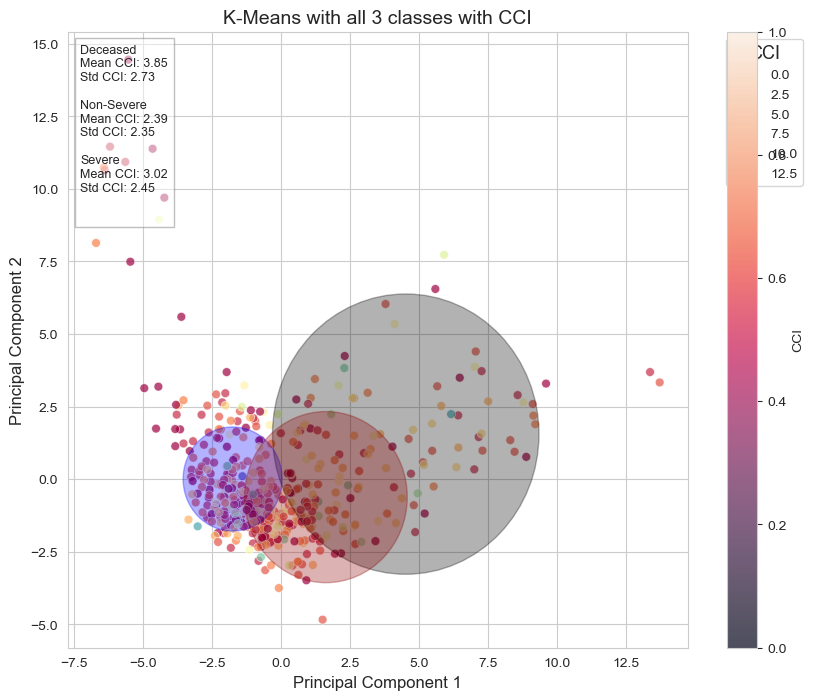

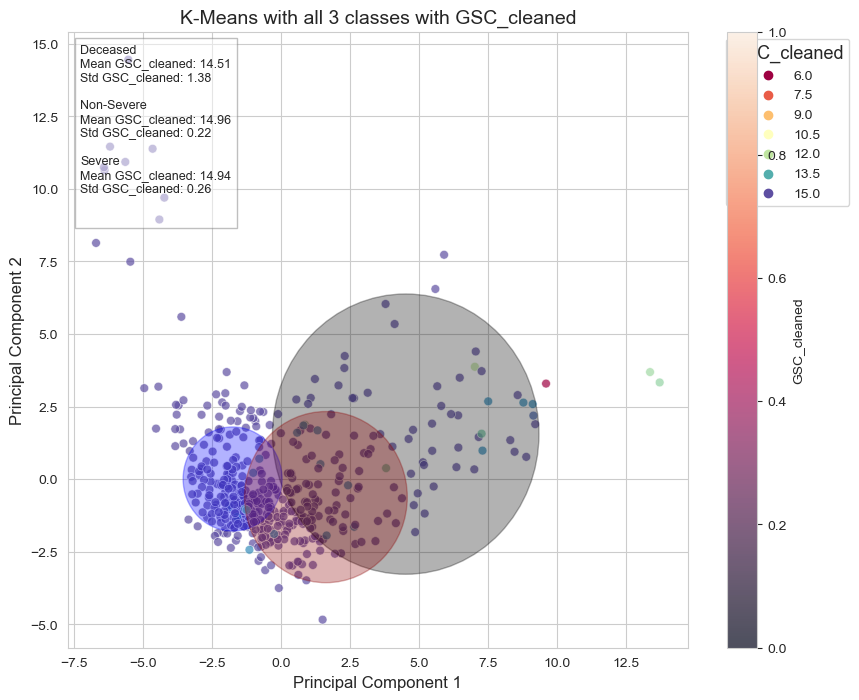

In [ ]:
import numpy as np
import matplotlib.patches as patches

# Standardize the features
U = dataset[features_to_cluster].fillna(1)
scaler = StandardScaler()
U_scaled = scaler.fit_transform(U)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(U_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels
principalDf['Cluster'] = dataset['Outcome_numerical'].values 

# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: 'Severe', 1: 'Non-Severe', 2: 'Deceased'})

# Merge the cluster information back to the original dataset
dataset['Cluster'] = principalDf['Cluster']

# Define your custom palette with improved colors for the scores
score_palette = sns.color_palette("Spectral", as_cmap=True)

# Define fade colors
fade_colors = {
    'Severe': '#8B000044',      # Dark Red
    'Non-Severe': '#0000FF44',  # Blue
    'Deceased': '#00000044'     # Black
}

# Function to annotate mean and std for scores
def annotate_score_mean_std(ax, group, score):
    grouped = dataset.groupby(group)[score]
    means = grouped.mean()
    stds = grouped.std()
    text_str = ''
    for name, mean, std in zip(means.index, means.values, stds.values):
        text_str += f'{name}\nMean {score}: {mean:.2f}\nStd {score}: {std:.2f}\n\n'
    ax.text(0.02, 0.98, text_str, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, edgecolor='grey'))

# Function to draw smaller and more faded circles around the clusters
def draw_smaller_faded_circles(ax, data, group):
    grouped = data.groupby(group)
    means = grouped.mean()
    stds = grouped.std()
    for name, mean, std in zip(means.index, means.values, stds.values):
        circle = patches.Circle((mean[0], mean[1]), std[0] * 1.5, color=fade_colors[name], alpha=0.3)
        ax.add_patch(circle)

# Plotting WHO Score
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['WHO score'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40)
plt.title('K-Means with all 3 classes with WHO Score', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='WHO Score', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='WHO Score')
annotate_score_mean_std(plt.gca(), 'Cluster', 'WHO score')
draw_smaller_faded_circles(plt.gca(), principalDf, 'Cluster')
plt.show()

# Plotting qSOFA
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['qSOFA'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40)
plt.title('K-Means with all 3 classes with qSOFA', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='qSOFA', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='qSOFA')
annotate_score_mean_std(plt.gca(), 'Cluster', 'qSOFA')
draw_smaller_faded_circles(plt.gca(), principalDf, 'Cluster')
plt.show()

# Plotting CCI
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['CCI'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40)
plt.title('K-Means with all 3 classes with CCI', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='CCI', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='CCI')
annotate_score_mean_std(plt.gca(), 'Cluster', 'CCI')
draw_smaller_faded_circles(plt.gca(), principalDf, 'Cluster')
plt.show()

# Plotting GSC_cleaned
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=dataset['GSC_cleaned'],
                          data=principalDf, palette=score_palette, alpha=0.7, s=40)
plt.title('K-Means with all 3 classes with GSC_cleaned', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='GSC_cleaned', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='GSC_cleaned')
annotate_score_mean_std(plt.gca(), 'Cluster', 'GSC_cleaned')
draw_smaller_faded_circles(plt.gca(), principalDf, 'Cluster')
plt.show()


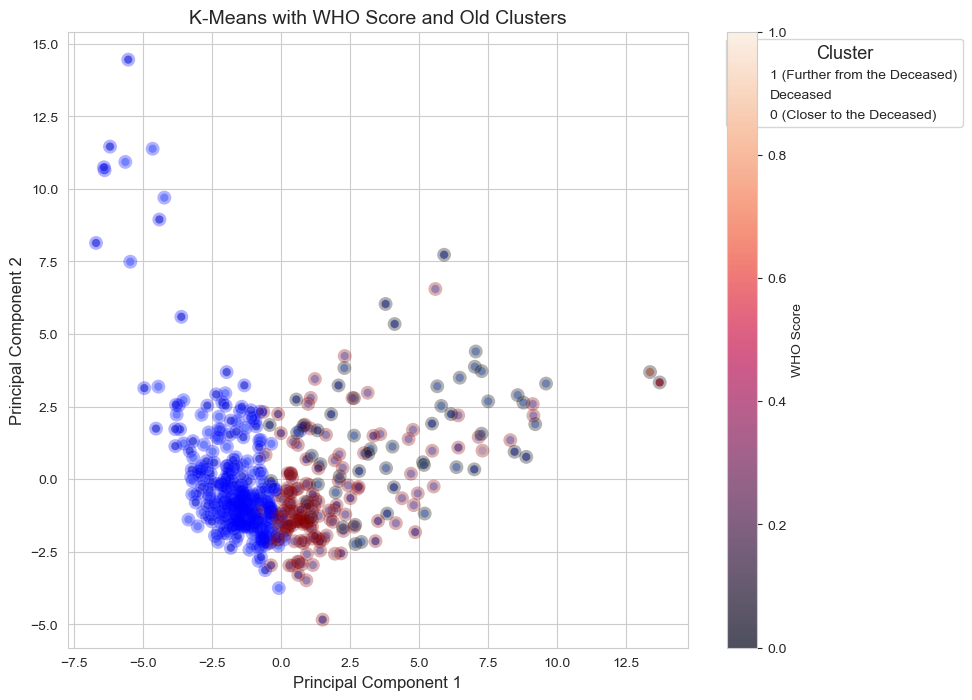

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply Seaborn styles for nicer plots
sns.set_style("whitegrid")

# Standardize the features
U = dataset[features_to_cluster].fillna(1)
scaler = StandardScaler()
U_scaled = scaler.fit_transform(U)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(U_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels and WHO score
principalDf['Cluster'] = dataset['Outcome_numerical'].values 
principalDf['WHO score'] = dataset['WHO score']

# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: '0 (Closer to the Deceased)', 1: '1 (Further from the Deceased)', 2: 'Deceased'})

# Define the color palette for WHO scores (black to red)
who_palette = sns.color_palette("coolwarm", as_cmap=True)

# Plotting with aesthetic improvements
plt.figure(figsize=(10, 8))  # Set the figure size for better clarity

# Scatter plot for WHO score
scatter = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='WHO score', 
                          data=principalDf, palette='coolwarm', alpha=0.7, s=40, legend=False) 

# Scatter plot for old clusters
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', 
                data=principalDf, palette={'0 (Closer to the Deceased)': 'darkred', 
                                           '1 (Further from the Deceased)': 'blue', 
                                           'Deceased': 'black'}, alpha=0.3, s=100, edgecolor='none')

plt.title('K-Means with WHO Score and Old Clusters', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter.collections[0], ax=scatter, orientation='vertical', label='WHO Score')
plt.show()


In [64]:
print(principalDf['Cluster'].unique())


['1 (Further from the Deceased)' 'Deceased' '0 (Closer to the Deceased)']


In [65]:
print("Original cluster labels:", principalDf['Cluster'].unique())


Original cluster labels: ['1 (Further from the Deceased)' 'Deceased' '0 (Closer to the Deceased)']


In [66]:
# Apply mapping
principalDf['Cluster'] = principalDf['Cluster'].map({0: 'Severe', 1: 'Non-Severe', 2: 'Deceased'})

# Check the resulting DataFrame
print("Mapped cluster labels:", principalDf['Cluster'].unique())
print("DataFrame after mapping:\n", principalDf.head())


Mapped cluster labels: [nan]
DataFrame after mapping:
    Principal Component 1  Principal Component 2 Cluster
0              -1.488911               2.345926     NaN
1              -0.738229               1.355580     NaN
2              -1.365806               1.444712     NaN
3              -2.132605               2.647499     NaN
4              -1.328892               3.232702     NaN


In [67]:
# Apply Seaborn styles for nicer plots
sns.set_style("whitegrid")

# Standardize the features
U = dataset[features_to_cluster].fillna(1)
scaler = StandardScaler()
U_scaled = scaler.fit_transform(U)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(U_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels
principalDf['Cluster'] = dataset['Outcome_numerical'].values 
# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: 'Severe', 1: 'Non-Severe', 2: 'Deceased'})


In [68]:
print(principalDf['Cluster'].unique())

['Non-Severe' 'Deceased' 'Severe']


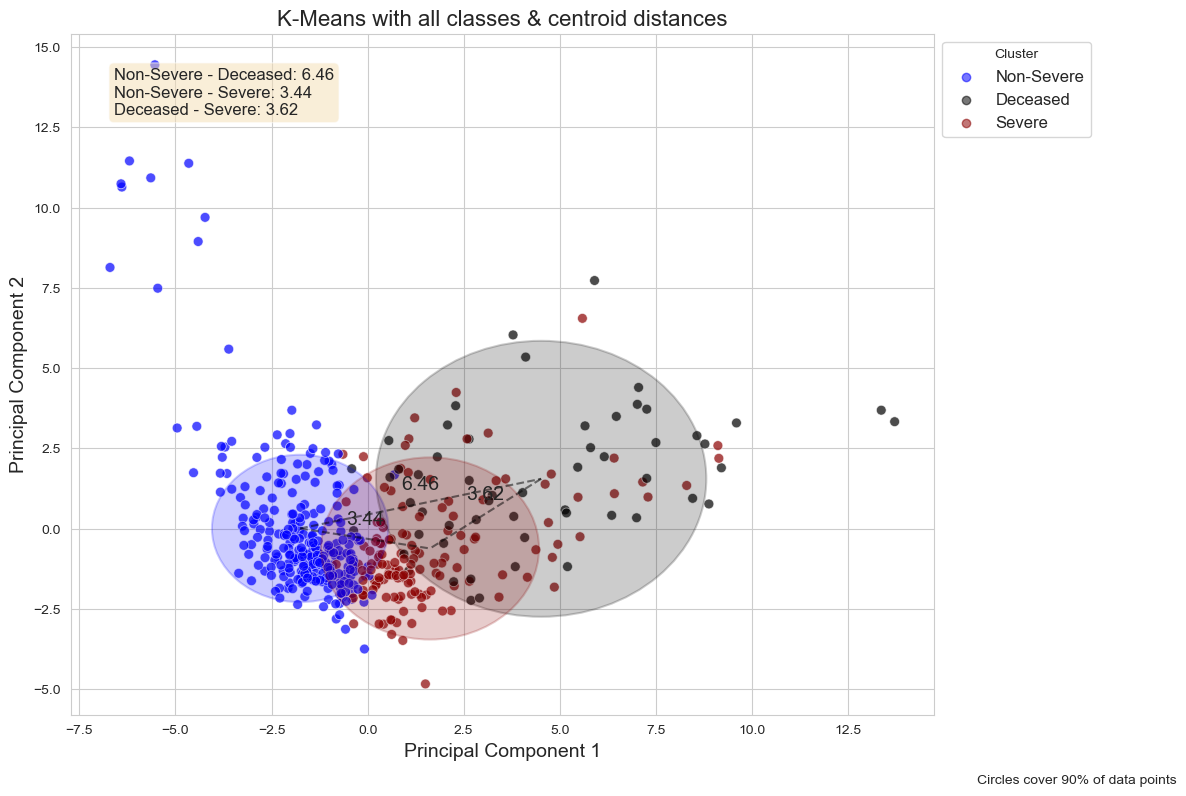

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Circle
from itertools import combinations
import math

# Define faded colors for each cluster label
fade_colors = {
    'Severe': '#8B000088',      # Dark Red
    'Non-Severe': '#0000FF88',  # Blue
    'Deceased': '#00000088'     # Black
}

# Initialize the plot with adjusted size
plt.figure(figsize=(12, 8))

# Draw the scatter plot first to control axes limits later
ax = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster',
                     data=principalDf, palette=fade_colors, alpha=0.7, s=50)

# Initialize centroids dictionary
centroids = {}

# Calculate and draw circles with the fade color for each cluster
for cluster in principalDf['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = principalDf[principalDf['Cluster'] == cluster]
    centroid = cluster_data[['Principal Component 1', 'Principal Component 2']].mean()
    centroids[cluster] = centroid  # Store the centroid
    distances = np.linalg.norm(cluster_data[['Principal Component 1', 'Principal Component 2']].values - centroid.values, axis=1)
    radius = np.percentile(distances, 80)  # Adjusting the radius to the 80th percentile

    # Draw a circle around the cluster
    circle = Circle((centroid[0], centroid[1]), radius, color=fade_colors[cluster], fill=True, alpha=0.2, linewidth=1.5)
    ax.add_patch(circle)

# Function to draw lines with annotations for distances
def draw_line_with_annotation(ax, point1, point2, distance):
    ax.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k--', alpha=0.5)
    mid_point = [(point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2]
    # Increase fontsize in the annotation
    ax.annotate(f'{distance:.2f}', xy=(mid_point[0], mid_point[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14)  # Increased fontsize
distance_texts = []
for (cluster1, centroid1), (cluster2, centroid2) in combinations(centroids.items(), 2):
    distance = np.linalg.norm(centroid1 - centroid2)
    distance_texts.append(f"{cluster1} - {cluster2}: {distance:.2f}")

# Combine distance texts into one string
distance_summary = "\n".join(distance_texts)

# Place a text box in upper left in axes coords
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, distance_summary, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# Calculate and annotate distances between each pair of centroids
for (cluster1, centroid1), (cluster2, centroid2) in combinations(centroids.items(), 2):
    distance = np.linalg.norm(centroid1 - centroid2)
    draw_line_with_annotation(ax, centroid1, centroid2, distance)

# Enhancing the plot
plt.title('K-Means with all classes & centroid distances', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Adjust legend inside the plot for clarity and add the note about 90% coverage
legend = plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.text(1.05, -0.1, 'Circles cover 90% of data points', transform=ax.transAxes, fontsize=10)

# Display the plot with adjusted layout
plt.tight_layout()
plt.show()


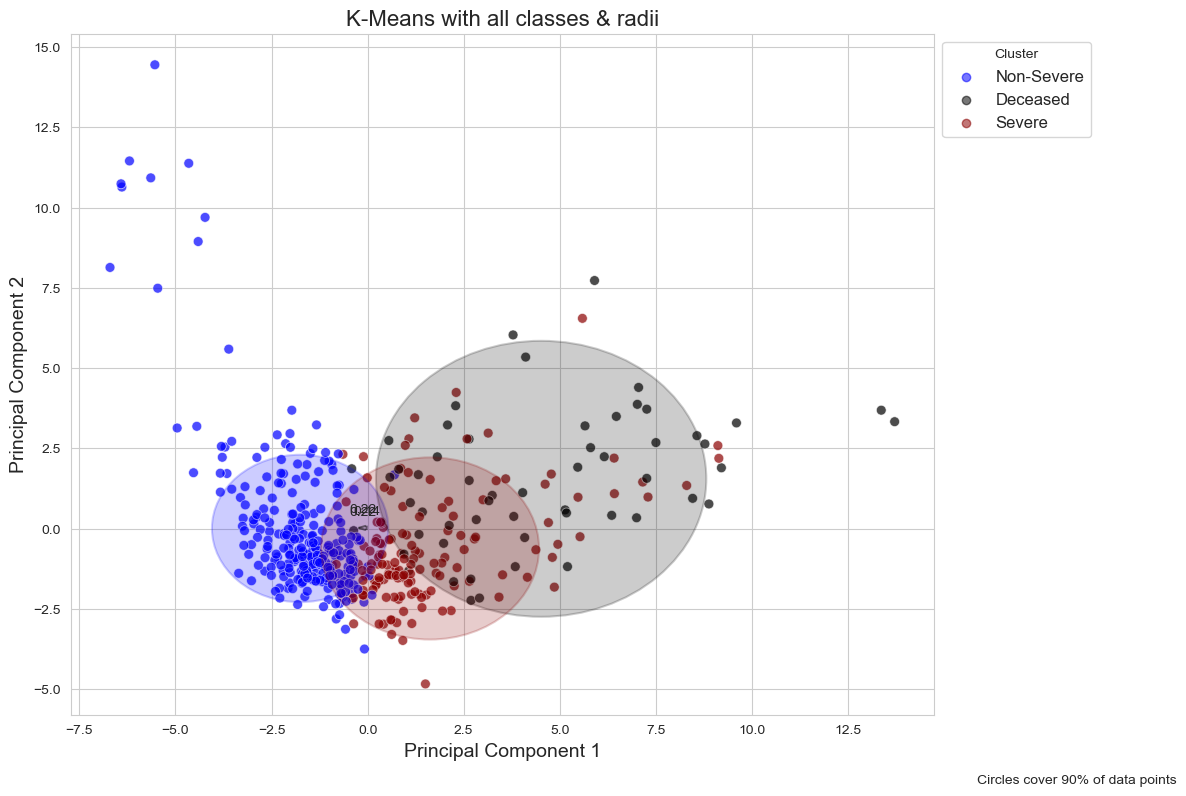

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Circle

# Define faded colors for each cluster label
fade_colors = {
    'Severe': '#8B000088',      # Dark Red 
    'Non-Severe': '#0000FF88',  # Blue 
    'Deceased': '#00000088'     # Black 
}

# Initialize the plot with adjusted size
plt.figure(figsize=(12, 8))

# Draw the scatter plot first to control axes limits later
ax = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster',
                     data=principalDf, palette=fade_colors, alpha=0.7, s=50)  # Increased size for better visibility

# Calculate and draw circles with the fade color for each cluster
for cluster in principalDf['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = principalDf[principalDf['Cluster'] == cluster]
    centroid = cluster_data[['Principal Component 1', 'Principal Component 2']].mean()
    distances = np.sqrt((cluster_data['Principal Component 1'] - centroid[0])**2 + 
                        (cluster_data['Principal Component 2'] - centroid[1])**2)
    radius = np.percentile(distances, 80)  # Adjusting the radius to the 90th percentile

    # Draw a circle around the cluster
    circle = Circle((centroid[0], centroid[1]), radius, color=fade_colors[cluster], fill=True, alpha=0.2, linewidth=1.5)
    ax.add_patch(circle)
    

# Enhancing the plot
plt.title('K-Means with all classes & radii', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Adjust legend inside the plot for clarity and add the note about 90% coverage
legend = plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.text(1.05, -0.1, 'Circles cover 90% of data points', transform=ax.transAxes, fontsize=10)  # Note below the legend

# Display the plot with adjusted layout
plt.tight_layout()  # Adjust the layout
plt.show()
